### Repetimos exactamente mismo analisis pero quitando setosa

#### Preparacion de data set

In [1]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
data(iris)
df = iris

In [3]:
df = select(df,Sepal.Width,Petal.Width,Species)
df$Species = as.factor(df$Species)


In [4]:
df = df[df$Species != "setosa",]

### a -

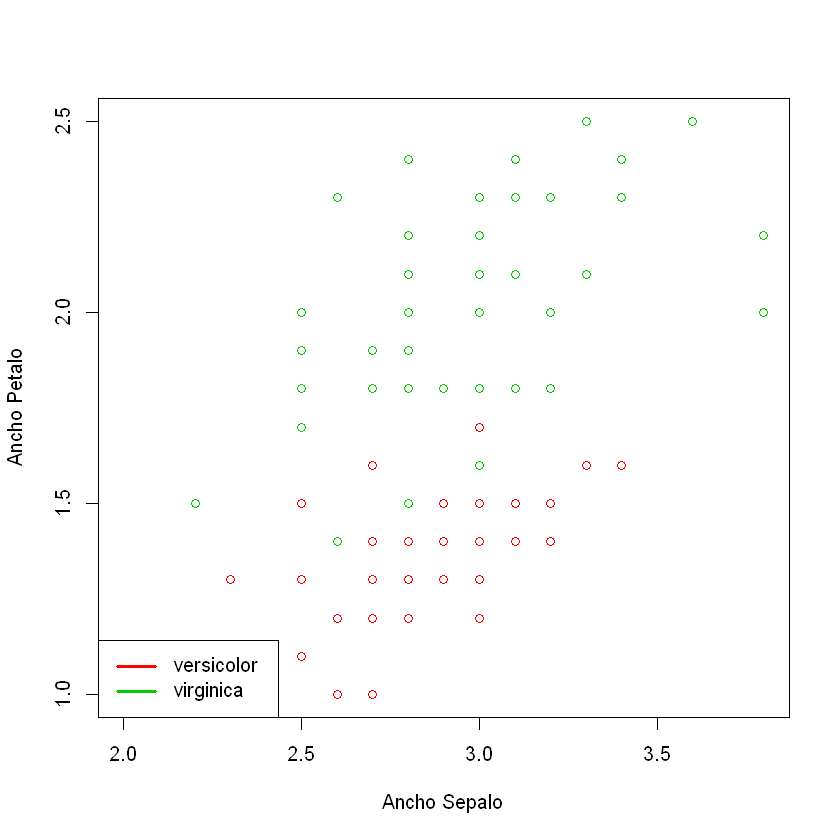

In [5]:
plot(df$Sepal.Width,df$Petal.Width,col=df$Species, xlab="Ancho Sepalo", ylab="Ancho Petalo")

legend("bottomleft", legend = unique(df$Species),
       lwd = 3, col=unique(df$Species))

p value
0.0003440401


p value
"Rechazo, no hay normalidad multivariada"


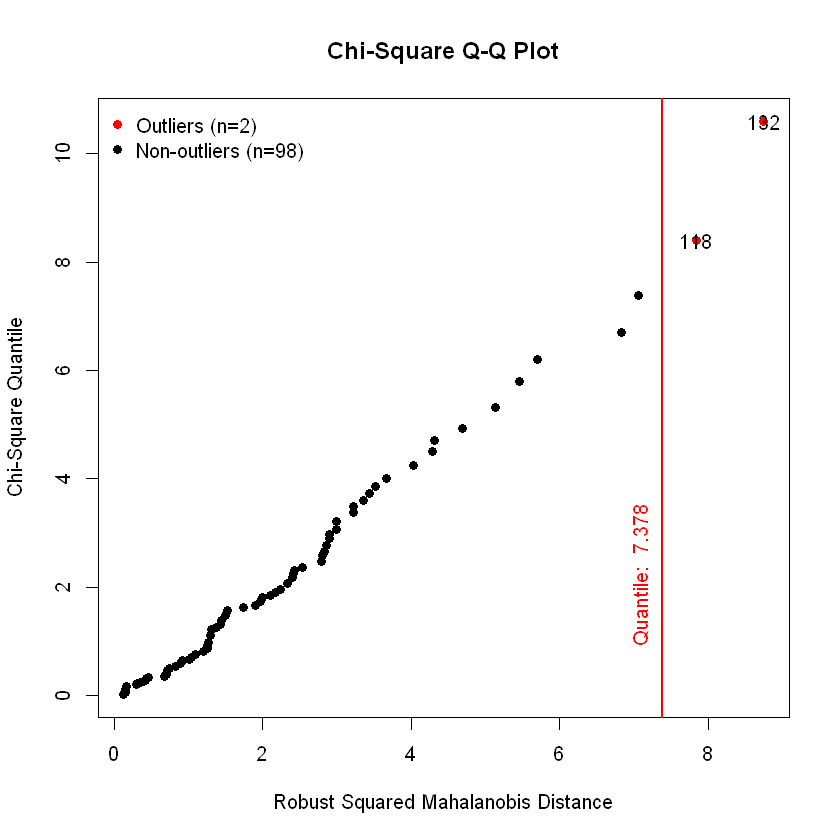

In [6]:
alfa = 0.001
library(MVN)
test = mvn(select(df,Sepal.Width,Petal.Width), mvnTest = "hz", multivariateOutlierMethod = "quan")
pvalue = test$multivariateNormality[3]
pvalue
ifelse(pvalue<alfa,"Rechazo, no hay normalidad multivariada","No rechazo, hay normalidad multivariada")

In [7]:
unique(df$Species)

[1] versicolor virginica 
Levels: setosa versicolor virginica

### Test de igualdad de varianzas

In [8]:
p <- 2
k <- 2


In [18]:
#n1 = nrow(df[df$Species=="setosa",])
n2 = nrow(df[df$Species=="versicolor",])
n3 = nrow(df[df$Species=="virginica",])
n = n2+n3

In [23]:
#q1 = (n1-1)*var(df[df$Species == "setosa",][,1:2])
q2 = (n2-1)*var(df[df$Species == "versicolor",][,1:2])
q3 = (n3-1)*var(df[df$Species == "virginica",][,1:2])

u = q2+q3
u

,Sepal.Width,Petal.Width
Sepal.Width,9.9212,4.3528
Petal.Width,4.3528,5.6124


In [24]:
xraya2 <- apply(df[df$Species == "versicolor",][,1:2], 2, mean)
xraya3 <- apply(df[df$Species == "virginica",][,1:2], 2, mean)

xraya <- (1/n)*(n2*xraya2+n3*xraya3)


H <- n2*(xraya2-xraya)%*%t(xraya2-xraya)+n3*(xraya3-xraya)%*%t(xraya3-xraya)

xraya

H

Sepal.Width Petal.Width 
      2.872       1.676

Sepal.Width,Petal.Width
1.0404,3.57
3.5700,12.25


### Finalmente recordando el test se tiene

<img src="test_igualdad_var_cov.png" width="800" height="400">



Con 


<img src="k_alfa.png" width="200" height="200">



#### Forma aproximada, aca usamos la convergencia en distribucion de -2log(gamma) a una chi cuadrado

In [25]:
#gamma <- (det(q1/n1)^(n1/2)*det(q2/n2)^(n2/2)*det(q3/n3)^(n3/2))/(det(u/n)^(n/2))
gamma <- (det(q2/n2)^(n2/2)*det(q3/n3)^(n3/2))/(det(u/n)^(n/2))
gamma_log = -2*log(gamma)

gl <- p*k+p*(p+1)*k/2-(p*k+p*(p+1)/2)

pvalor <- pchisq(gamma_log, gl, ncp=0, lower.tail = FALSE)

pvalor

ifelse(pvalor>alfa,"No rechazo Ho, puedo asumir igualdad de matrices de covarianzas",
       "Rechazo Ho, no puedo asumir igualdad de matrices de covarianza")
# A nivel 0.01 no rechazo igualdad de varianzas entre las especies versi y virgi

[1] 0.01960443

[1] "No rechazo Ho, puedo asumir igualdad de matrices de covarianzas"

### b -

### Test igualdad de medias suponiendo igualdad en las covarianzas

#### Recordando lo visto en clase, el test cociente de verosimilitud viene dado por

<img src="test_igualdad_medias(igualcov_).png" width="800" height="400">


#### Forma Exacta

In [26]:
gammab <- (det(u)/(det(u+H)))^{n/2}

gl <- p*k+p*(p+1)*(k/2)

k_alfa = (-1/(n*p))*exp(qchisq(alfa, df=gl) )

ifelse(gamma<k_alfa,"Rechazo Ho, al menos una media es distinta","No rechazo Ho, todas las medias son iguales")

p_valor_exacto = pchisq(-n*p*log(gamma), df=gl)
p_valor_exacto

[1] "No rechazo Ho, todas las medias son iguales"

[1] 1

#### Forma Aproximada

In [27]:
gl <- p*k+p*(p+1)/2-(p+p*(p+1)/2)

gamma_logb = -2*log(gammab)

pvalor <-  pchisq(gamma_log, gl, ncp=0, lower.tail = FALSE)

ifelse(pvalor<alfa,"Rechazo Ho, al menos una media es distinta","No rechazo Ho, todas las medias son iguales")

pvalor


[1] "No rechazo Ho, todas las medias son iguales"

[1] 0.0071507

### c-

#### Coordenadas discriminantes

Recordar segun nomenclatura

$ \Large \frac{U}{n}$ estima a $\Sigma_w$
$ \Large \frac{H}{n}$ estima a $\Sigma_B$


A su vez 

$\alpha_j$ es el autovector asociado a $\Sigma_w^{-1}~\Sigma_B$

In [29]:
a1 = eigen(solve(u/n)%*%(H/n))$vectors[,1]
A = as.matrix(cbind(a1))

zraya2 <- t(A)%*%xraya2
zraya3 <- t(A)%*%xraya3




In [33]:
zraya3

a1,-1.041913


#### Proyecto sobre las coordenadas discriminantes

In [35]:
x2proy <- as.vector(t(A)%*%t(df[df$Species=="versicolor",][,1:2]))
x3proy <- as.vector(t(A)%*%t(df[df$Species=="virginica",][,1:2]))

In [45]:
A

a1
0.2996034
-0.9540638


In [42]:
length(x2proy)

[1] 50

In [44]:
nrow(df[df$Species=="versicolor",][,1:2])

[1] 50

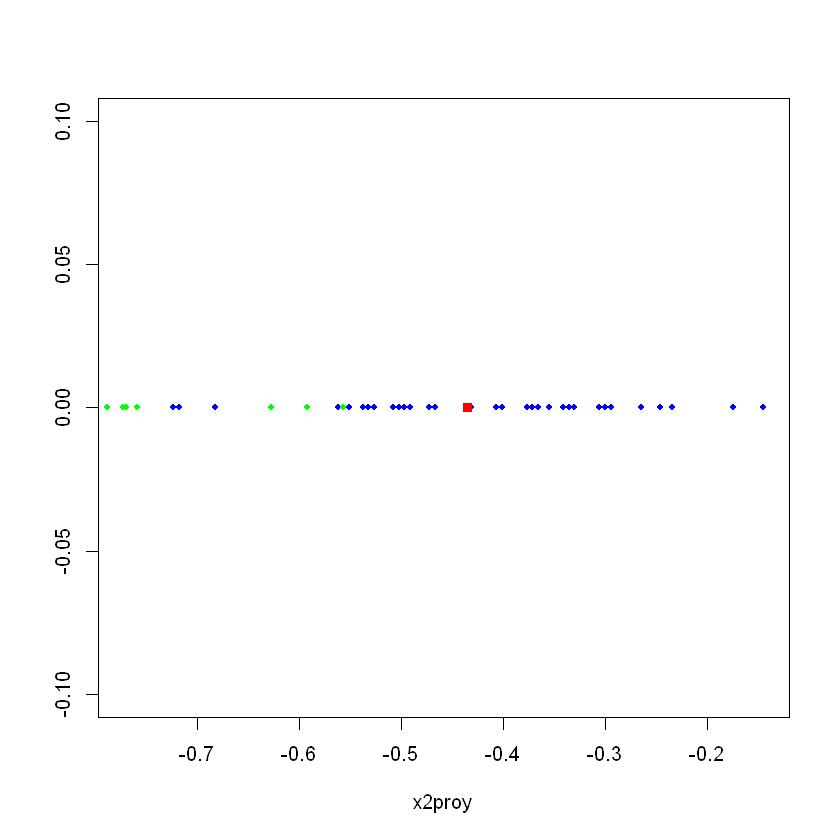

In [31]:
plot(x2proy,c(rep(0,n2)), col="blue",
     ylim=c(-0.1,0.1), pch=20, ylab="")
points(x3proy,c(rep(0,n3)), col="green",pch=20)
points(zraya2, 0, pch=15, lwd=4, col="red")
points(zraya3, 0, pch=17, lwd=4, col="red")